<a href="https://colab.research.google.com/github/reddykushal7781/Bike_Rental_Data_Analysis/blob/main/BikeSharingAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Overview**


### **Problem Statement**

To build a multiple linear regression model for the prediction of demand for shared bikes.

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.




In [2]:
# Loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the csv file
path = "/content/drive/MyDrive/python/class 04/day.csv"
data = pd.read_csv(path)
# to see the data points in 1st 5 rows
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# Read the csv file
path = "/content/drive/MyDrive/python/class 04/day.csv"
data = pd.read_csv(path)
# to see the data points in 1st 5 rows
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# to see the data points in last 5 rows
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
# to check the number of rows and columns in the dataframe
data.shape
# there are 730 rows and 16 columns

(730, 16)

In [6]:
# checking the datatypes of each column
data.info()
# we have 4 columns as decimals(float64), 1 as text(object) which is the date column and 11 as integers(int64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# to see the Central tendancy(mean ,median, mode and other summary statitics for each column)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [8]:
# checking for null rows in each column
data.isnull().sum()
# No null values are seen in the data

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
# to check for duplicate rows
data_duplicates = data.copy()
data_duplicates.drop_duplicates(subset = None, inplace = True)
data_duplicates.shape

# By using drop function we understand that there are no duplicates seen in the dataframe as both original data and data_duplicates shows the same number of rows.

(730, 16)

In [10]:
# to check how many distinct values in each column are there in the dataframe
data.nunique()

,0
instant,730
dteday,730
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,498


In [11]:
# to check distinct values in each column separately
for col in data.columns:
    print(data[col].value_counts(dropna=False).sort_index(ascending=True), '\n\n')

instant
1      1
2      1
3      1
4      1
5      1
      ..
726    1
727    1
728    1
729    1
730    1
Name: count, Length: 730, dtype: int64 


dteday
01-01-2018    1
01-01-2019    1
01-02-2018    1
01-02-2019    1
01-03-2018    1
             ..
31-08-2019    1
31-10-2018    1
31-10-2019    1
31-12-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 


season
1    180
2    184
3    188
4    178
Name: count, dtype: int64 


yr
0    365
1    365
Name: count, dtype: int64 


mnth
1     62
2     56
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: count, dtype: int64 


holiday
0    709
1     21
Name: count, dtype: int64 


weekday
0    104
1    105
2    105
3    104
4    104
5    104
6    104
Name: count, dtype: int64 


workingday
0    226
1    504
Name: count, dtype: int64 


weathersit
1    463
2    246
3     21
Name: count, dtype: int64 


temp
2.424346     1
3.957390     1
3.993043     1
4.407500     1
5.227500     1
  

## Removing columns based on data dictionary and business understanding

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

The 1st column 'instant' is more similar to index column.

Also, in the dataset we have 'yr' and 'mnth' as separate columns and column 'dteday' is repeating the same information .

Hence, we can remove 'instant' , 'dteday', 'casual' and  'registered' columns which can create problems while selecting best features for model building.

In [12]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# using columns to get all the column names
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
data_new = data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
 # Here created new dataframe so that the original data is not disturbed which may be helpful for any furture validations.

In [15]:
data_new.head(3) # cross checked if the new data is reading correctly

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [16]:
# since 'cnt' is the target variable  will move it as the 1st column in the new dataframe
data_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [17]:
# moved 'cnt' to the begining of the table
data_new = data_new[['cnt','season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

In [18]:
# cross checking if the data is reading correctly
data_new.head(3)

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,985,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882
1,801,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113
2,1349,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703


In [19]:
# To create dummy variables for the categorical columns which are : year, month, weekday, season and weathersit

# First step is to convert their datatypes into categorical as they are seen as int64
data_new['yr']=data_new['yr'].astype('category')
data_new['weekday']=data_new['weekday'].astype('category')
data_new['mnth']=data_new['mnth'].astype('category')
data_new['weekday']=data_new['weekday'].astype('category')
data_new['season']=data_new['season'].astype('category')
data_new['weathersit']=data_new['weathersit'].astype('category')


In [20]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cnt         730 non-null    int64   
 1   season      730 non-null    category
 2   yr          730 non-null    category
 3   mnth        730 non-null    category
 4   holiday     730 non-null    int64   
 5   weekday     730 non-null    category
 6   workingday  730 non-null    int64   
 7   weathersit  730 non-null    category
 8   temp        730 non-null    float64 
 9   atemp       730 non-null    float64 
 10  hum         730 non-null    float64 
 11  windspeed   730 non-null    float64 
dtypes: category(5), float64(4), int64(3)
memory usage: 44.8 KB


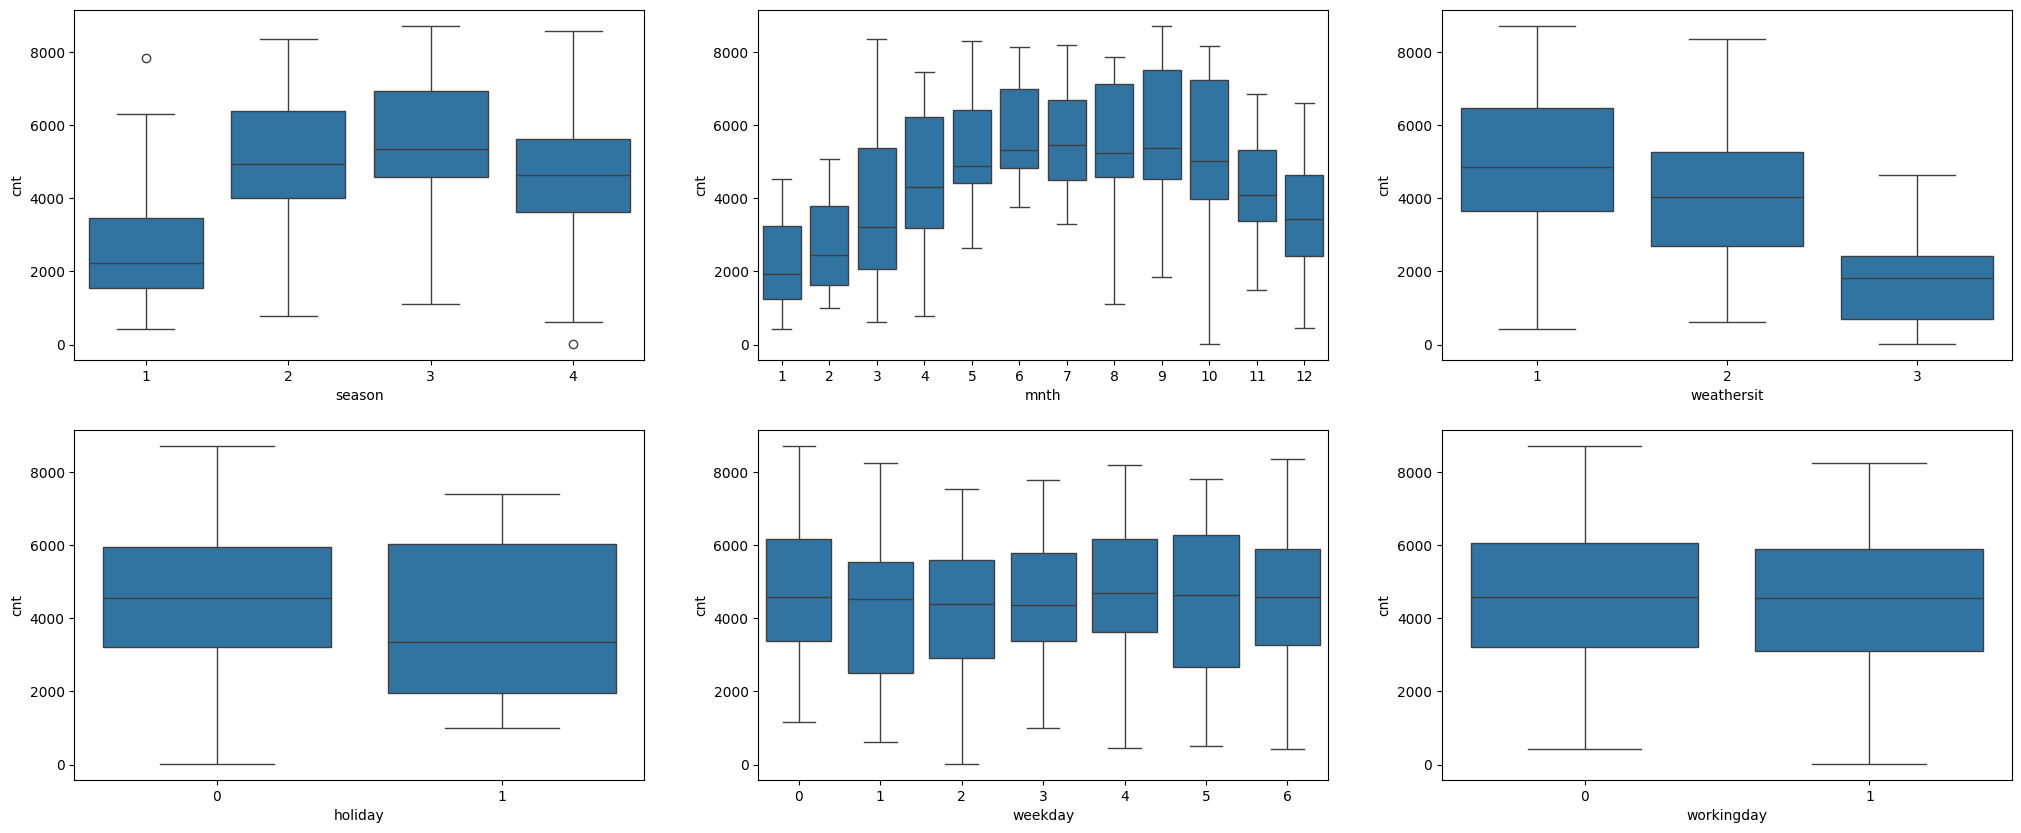

In [21]:
# visualizing categorical columns
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt'
# to see how each of the predictor variable Vs the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data_new)
plt.show()

From the six categorical columns we get the below insights

The inference that we could derive are as below:

season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

In [23]:
for col in data_new.columns:
  print(data_new[col].value_counts(dropna = False).sort_index(ascending = True), '\n\n')

# # to check distinct values in each column separately
# for col in data.columns:
#     print(data[col].value_counts(dropna=False).sort_index(ascending=True), '\n\n')

cnt
22      1
431     1
441     1
506     1
605     1
       ..
8294    1
8362    1
8395    1
8555    1
8714    1
Name: count, Length: 695, dtype: int64 


season
1    180
2    184
3    188
4    178
Name: count, dtype: int64 


yr
0    365
1    365
Name: count, dtype: int64 


mnth
1     62
2     56
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: count, dtype: int64 


holiday
0    709
1     21
Name: count, dtype: int64 


weekday
0    104
1    105
2    105
3    104
4    104
5    104
6    104
Name: count, dtype: int64 


workingday
0    226
1    504
Name: count, dtype: int64 


weathersit
1    463
2    246
3     21
Name: count, dtype: int64 


temp
2.424346     1
3.957390     1
3.993043     1
4.407500     1
5.227500     1
            ..
34.200847    1
34.371653    1
34.781653    1
34.815847    1
35.328347    1
Name: count, Length: 498, dtype: int64 


atemp
3.953480     1
4.941955     1
5.082900     1
5.808750     1
5.896500     1
       

In [24]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cnt         730 non-null    int64   
 1   season      730 non-null    category
 2   yr          730 non-null    category
 3   mnth        730 non-null    category
 4   holiday     730 non-null    int64   
 5   weekday     730 non-null    category
 6   workingday  730 non-null    int64   
 7   weathersit  730 non-null    category
 8   temp        730 non-null    float64 
 9   atemp       730 non-null    float64 
 10  hum         730 non-null    float64 
 11  windspeed   730 non-null    float64 
dtypes: category(5), float64(4), int64(3)
memory usage: 44.8 KB


In [25]:
# here it will create dummy columns based on the distinct values that is in each category column.
# it will drop the original columns
data_new = pd.get_dummies(data_new)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   season_1      730 non-null    bool   
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  yr_0          730 non-null    bool   
 12  yr_1          730 non-null    bool   
 13  mnth_1        730 non-null    bool   
 14  mnth_2        730 non-null    bool   
 15  mnth_3        730 non-null    bool   
 16  mnth_4        730 non-null    bool   
 17  mnth_5        730 non-null    bool   
 18  mnth_6        730 non-null    

In [26]:
# Identify the bool columns
bool_columns = data_new.select_dtypes(include='bool').columns

# Convert the bool columns to int type
data_new[bool_columns] = data_new[bool_columns].astype(int)
data_new.head()

,cnt,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,985,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,801,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1349,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1562,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1600,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [28]:
data_new[bool_columns].T

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
season_1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
season_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
season_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
season_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yr_0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
yr_1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
mnth_1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
mnth_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mnth_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mnth_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data_new.shape
# now we have 35 columns and 730 rows

(730, 35)

In [30]:
#importing necessary libraries for multiple linear regression model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# specifying random_state ensures reproducibility and consistency in data splitting,
#which is essential for reliable model evaluation and debugging in machine learning workflows.

np.random.seed(0)
# this initializes the NumPy random number generator with a fixed seed,
# ensuring reproducible random numbers for testing, debugging, and ensuring consistent behavior across different runs of the code.

data_new_train, data_new_test = train_test_split(data_new, train_size = 0.8, test_size = 0.2, random_state = 350)

In [31]:
print(data_new_train.shape)
print(data_new_test.shape)
# this ensures that data is split correctly

(584, 35)
(146, 35)


In [32]:
data_new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 546 to 635
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           584 non-null    int64  
 1   holiday       584 non-null    int64  
 2   workingday    584 non-null    int64  
 3   temp          584 non-null    float64
 4   atemp         584 non-null    float64
 5   hum           584 non-null    float64
 6   windspeed     584 non-null    float64
 7   season_1      584 non-null    int64  
 8   season_2      584 non-null    int64  
 9   season_3      584 non-null    int64  
 10  season_4      584 non-null    int64  
 11  yr_0          584 non-null    int64  
 12  yr_1          584 non-null    int64  
 13  mnth_1        584 non-null    int64  
 14  mnth_2        584 non-null    int64  
 15  mnth_3        584 non-null    int64  
 16  mnth_4        584 non-null    int64  
 17  mnth_5        584 non-null    int64  
 18  mnth_6        584 non-null    int

In [33]:
data_new_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 256 to 18
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           146 non-null    int64  
 1   holiday       146 non-null    int64  
 2   workingday    146 non-null    int64  
 3   temp          146 non-null    float64
 4   atemp         146 non-null    float64
 5   hum           146 non-null    float64
 6   windspeed     146 non-null    float64
 7   season_1      146 non-null    int64  
 8   season_2      146 non-null    int64  
 9   season_3      146 non-null    int64  
 10  season_4      146 non-null    int64  
 11  yr_0          146 non-null    int64  
 12  yr_1          146 non-null    int64  
 13  mnth_1        146 non-null    int64  
 14  mnth_2        146 non-null    int64  
 15  mnth_3        146 non-null    int64  
 16  mnth_4        146 non-null    int64  
 17  mnth_5        146 non-null    int64  
 18  mnth_6        146 non-null    int6

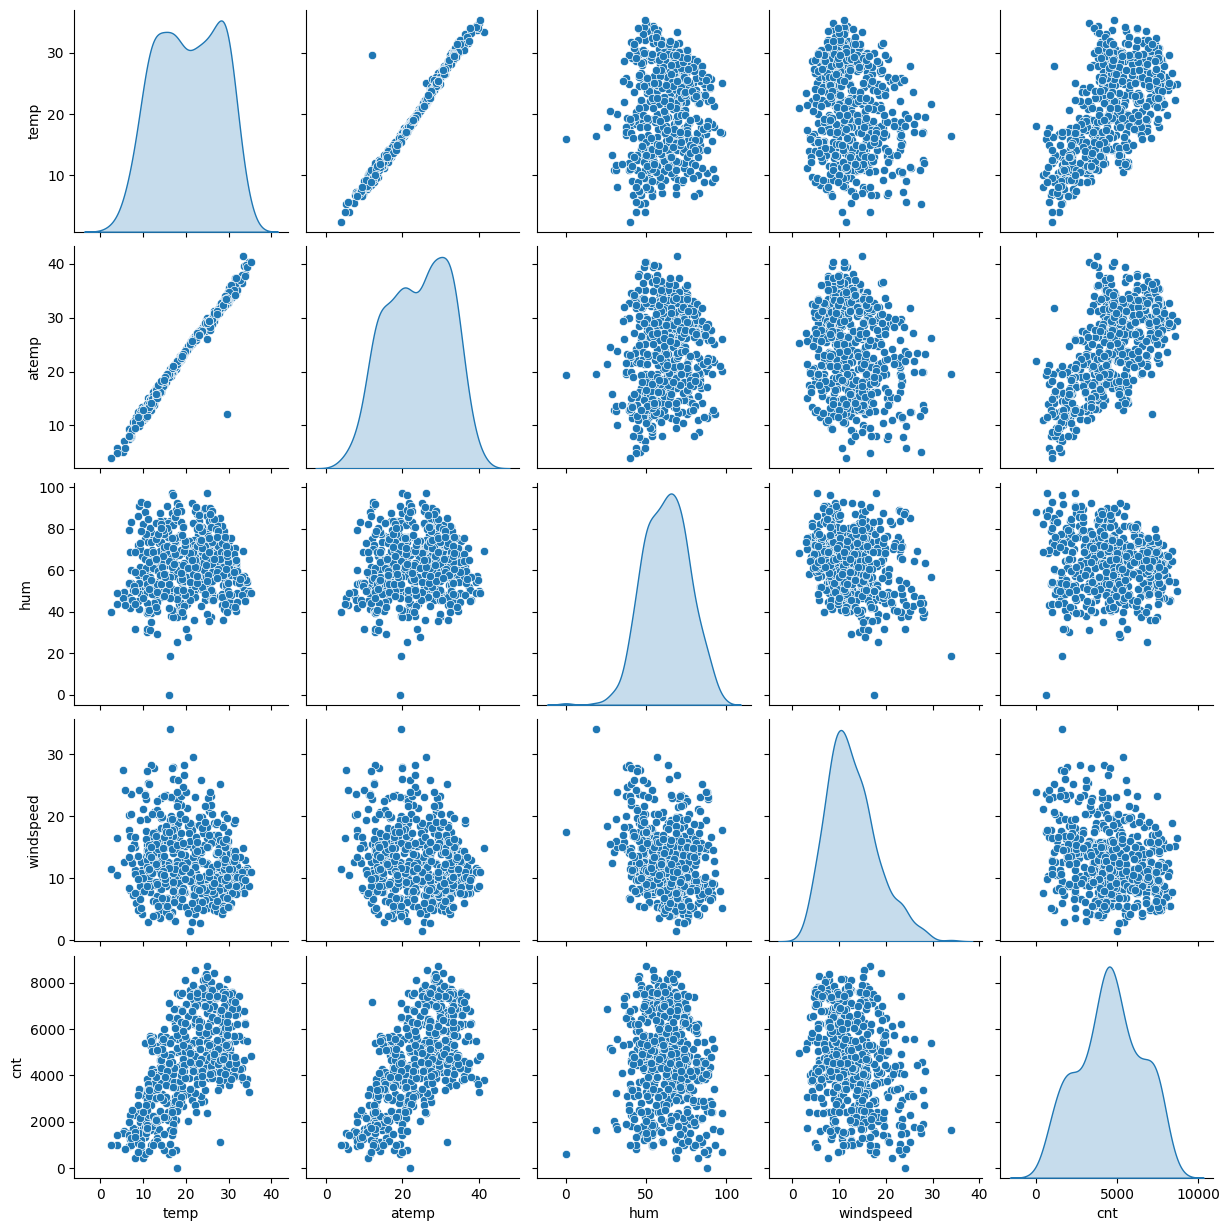

In [34]:
#Creating pairplots for only numeric variables:

data_num = data_new_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(data_num, diag_kind='kde')
plt.show()

#We see there is a liner regression between 'cnt', 'temp' and 'atemp'

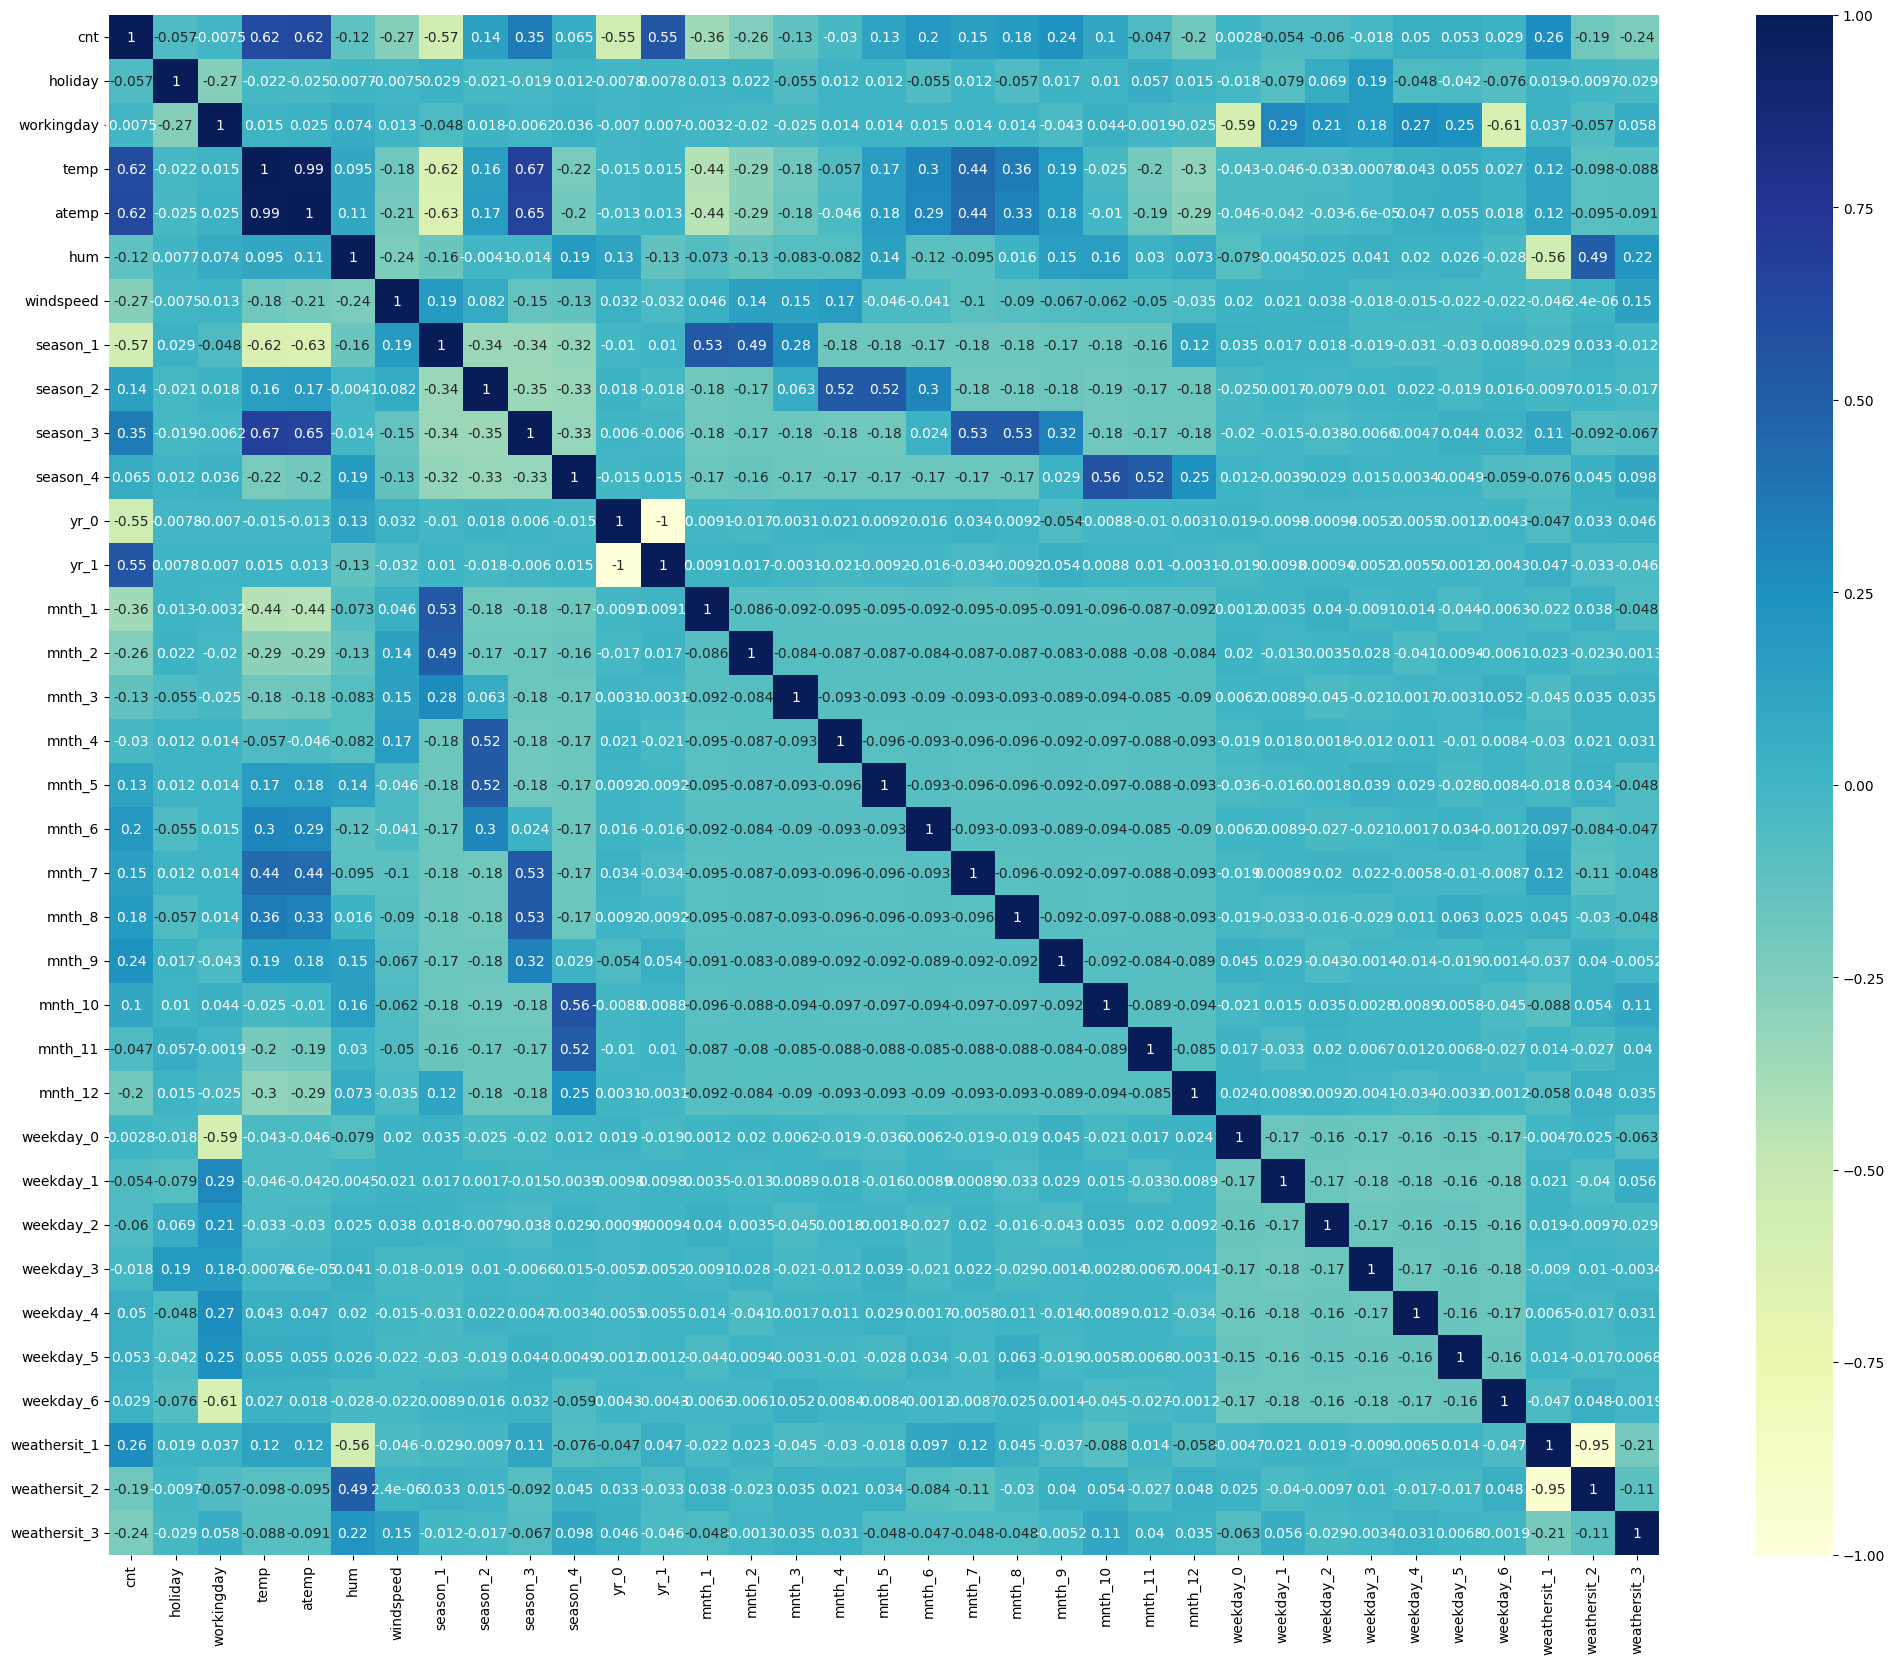

In [35]:
# ploting the correlation graph to see which are the columns that are highly correlated
plt.figure(figsize = (25,20))
sns.heatmap(data_new_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the corerlation matrix of the above heatmap we see which all variables are multicollinear in nature and which has high collinearity with the 'cnt' target variable.

Typically, a correlation coefficient above 0.8 or below -0.8 is considered high.

Multicollinearity: Look for pairs of independent variables (features) with high correlation coefficients.

1. weathersit_2 with hum = 0.49

2. mnth_11 with season_4 = 0.52

3. mnth_10 with season_4 = 0.56

4. season_3 with temp = 0.67

5. season_3 with atemp = 0.65

Collinearity with Target Variable: Check the correlation coefficients of the features with the target variable.

1. cnt with temp = 0.62

2. cnt with atemp = 0.62

3. cnt with yr_1 = 0.55

In [36]:
# Let us rescle the features
scaler = MinMaxScaler()

In [37]:
# Apply scaler() to all the numeric variables

num_vars = ['cnt','temp', 'atemp', 'hum', 'windspeed']

data_new_train[num_vars] = scaler.fit_transform(data_new_train[num_vars])
data_new_train.head()

,cnt,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
546,0.633801,0,1,0.942889,0.898646,0.533419,0.301270,0,0,1,...,0,1,0,0,0,0,0,1,0,0
222,0.548780,0,0,0.820361,0.766025,0.435733,0.293574,0,0,1,...,0,0,0,0,0,0,1,1,0,0
187,0.525771,0,0,0.860857,0.813328,0.669666,0.282038,0,0,1,...,0,0,0,0,0,0,1,1,0,0
272,0.595950,0,0,0.629300,0.623255,0.665810,0.379497,0,0,0,...,1,0,0,0,0,0,0,1,0,0
207,0.533134,0,1,0.892009,0.818408,0.414311,0.332057,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [38]:
data_new_train.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,584.0,0.521293,0.223428,0.0,0.366947,0.523873,0.692706,1.0
holiday,584.0,0.032534,0.177566,0.0,0.000000,0.000000,0.000000,1.0
workingday,584.0,0.684932,0.464941,0.0,0.000000,1.000000,1.000000,1.0
temp,584.0,0.550812,0.225672,0.0,0.358556,0.557133,0.748713,1.0
atemp,584.0,0.536095,0.215922,0.0,0.362619,0.553967,0.717050,1.0
hum,584.0,0.642197,0.144600,0.0,0.536632,0.647815,0.747750,1.0
windspeed,584.0,0.347113,0.163975,0.0,0.230451,0.321800,0.440054,1.0
season_1,584.0,0.246575,0.431387,0.0,0.000000,0.000000,0.000000,1.0
season_2,584.0,0.261986,0.440092,0.0,0.000000,0.000000,1.000000,1.0
season_3,584.0,0.256849,0.437270,0.0,0.000000,0.000000,1.000000,1.0


In [39]:
# Defining your X and y
y_train = data_new_train.pop('cnt')
X_train = data_new_train

In [40]:
# Using RFE technique to choose the features contributing significantly towards explaining the demand of the shared bikes
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
# here selecting top 20 features
rfe = RFE(estimator=lr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [ ]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['temp', 'atemp', 'hum', 'windspeed', 'season_1', 'season_4', 'yr_0',
       'yr_1', 'mnth_1', 'mnth_2', 'mnth_5', 'mnth_7', 'mnth_9', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')


In [ ]:
# here we are seeing the feature names from X_train.columns
# A boolean indicating if the feature was selected by RFE (True or False)
# The ranking of the feature according to RFE.

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', False, 15),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_1', True, 1),
 ('season_2', False, 9),
 ('season_3', False, 8),
 ('season_4', True, 1),
 ('yr_0', True, 1),
 ('yr_1', True, 1),
 ('mnth_1', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', False, 10),
 ('mnth_4', False, 13),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', True, 1),
 ('mnth_8', False, 12),
 ('mnth_9', True, 1),
 ('mnth_10', False, 11),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_0', False, 7),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 6),
 ('weekday_5', False, 5),
 ('weekday_6', False, 4),
 ('weathersit_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [ ]:
# putting all the selected features into a dataframe called 'col'
col = X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_1', 'season_4', 'yr_0',
       'yr_1', 'mnth_1', 'mnth_2', 'mnth_5', 'mnth_7', 'mnth_9', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [ ]:
# dropping all the other features which it did not select
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_2', 'season_3', 'mnth_3', 'mnth_4',
       'mnth_6', 'mnth_8', 'mnth_10', 'weekday_0', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [ ]:
# Training the data with RFE selected variables
X_train_rfe = X_train[col]

Building Linear Model using 'STATS MODEL'

Model 1: VIF check


A VIF of 1 indicates no correlation between the variable and other predictors.
A VIF between 1 and 5 indicates moderate correlation.
A VIF greater than 5 indicates high correlation, and anything above 10 is considered very high, suggesting serious multicollinearity.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

vif


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Features,VIF
19,weathersit_3,inf
6,yr_0,inf
18,weathersit_2,inf
17,weathersit_1,inf
7,yr_1,inf
0,temp,56.56
1,atemp,55.26
4,season_1,3.91
8,mnth_1,2.32
5,season_4,2.26


In [ ]:
import statsmodels.api as sm

# Add a constant
X_train_lr1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lr1).fit()

In [ ]:
# seeing the coeffients or the beta1's
lr1.params

const           0.248373
temp            0.235511
atemp           0.152781
hum            -0.192300
windspeed      -0.172464
season_1       -0.111350
season_4        0.076156
yr_0            0.010118
yr_1            0.238255
mnth_1         -0.064681
mnth_2         -0.039725
mnth_5          0.027193
mnth_7         -0.058004
mnth_9          0.065896
mnth_11        -0.084117
mnth_12        -0.075069
weekday_1      -0.026073
weekday_2      -0.027945
weathersit_1    0.176459
weathersit_2    0.130253
weathersit_3   -0.058339
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.39e-210
Time:                        06:32:08   Log-Likelihood:                 580.35
No. Observations:                 584   AIC:                            -1123.
Df Residuals:                     565   BIC:                            -1040.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2484      0.019     12.775   

Model 2 : To build without 'atemp' as its has high VIF and p-value

In [ ]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Features,VIF
18,weathersit_3,inf
6,yr_1,inf
17,weathersit_2,inf
16,weathersit_1,inf
5,yr_0,inf
3,season_1,3.91
0,temp,3.74
7,mnth_1,2.31
4,season_4,2.25
8,mnth_2,1.98


In [ ]:
# Add a constant
X_train_lr2 = sm.add_constant(X_train_new)

# Create a second fitted model
lr2 = sm.OLS(y_train, X_train_lr2).fit()

print(lr2.params)

const           0.249738
temp            0.378427
hum            -0.189766
windspeed      -0.177128
season_1       -0.111010
season_4        0.077288
yr_0            0.010838
yr_1            0.238901
mnth_1         -0.066298
mnth_2         -0.040270
mnth_5          0.027996
mnth_7         -0.057589
mnth_9          0.065696
mnth_11        -0.084636
mnth_12        -0.075955
weekday_1      -0.025676
weekday_2      -0.027620
weathersit_1    0.177472
weathersit_2    0.130954
weathersit_3   -0.058688
dtype: float64


In [ ]:
# Print  summary of the linear regression model2 obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     173.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          3.56e-211
Time:                        06:32:08   Log-Likelihood:                 579.64
No. Observations:                 584   AIC:                            -1123.
Df Residuals:                     566   BIC:                            -1045.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2497      0.019     12.864   

Model 3:

Removing the variable 'season_1' based on its Very High 'VIF' value.

Decided to drop 'season_1' and not 'temp' , 'hum' or 'windspeed' as temperature, humidity and windspeed can be an important factor for a business like bike rentals, and wanted to retain them.

Also, not removing 'yr_0' though its showing high p-value, since it is an important column for the analysis.

In [ ]:
X_train_new = X_train_new.drop(["season_1"], axis = 1)

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Features,VIF
17,weathersit_3,inf
5,yr_1,inf
16,weathersit_2,inf
15,weathersit_1,inf
4,yr_0,inf
0,temp,3.13
1,hum,1.96
6,mnth_1,1.87
3,season_4,1.82
11,mnth_11,1.63


In [ ]:
# Add a constant
X_train_lr3 = sm.add_constant(X_train_new)

# Create a third fitted model
lr3 = sm.OLS(y_train, X_train_lr3).fit()

lr3.params

const           0.216098
temp            0.462032
hum            -0.201579
windspeed      -0.182478
season_4        0.115002
yr_0           -0.005178
yr_1            0.221276
mnth_1         -0.124067
mnth_2         -0.105601
mnth_5          0.044676
mnth_7         -0.058469
mnth_9          0.070789
mnth_11        -0.082273
mnth_12        -0.098659
weekday_1      -0.025357
weekday_2      -0.026897
weathersit_1    0.163938
weathersit_2    0.119050
weathersit_3   -0.066891
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.06e-203
Time:                        06:32:08   Log-Likelihood:                 559.11
No. Observations:                 584   AIC:                            -1084.
Df Residuals:                     567   BIC:                            -1010.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2161      0.019     11.171   

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.

# **Final Model Interpretation**

Null Hypothesis : All the co-efficient are equal to zero.

Alternate Hypothesis :  All the co-efficient are not equal to zero.

from the Model 3 summary report we understand that all the Co - efficient are not equal to zero, which means we reject the null hypothesis.

Also F-Statistics is 169 which is greater than 1 and the p-value is 1.06e-203 , which states that overall model is significant.

The equation of best fitted surface based on model lr3:

cnt = 0.2161+(0.4620*temp)+(-0.2016*hum)+(-0.1825*windspeed)+(0.1150*season_4)+(-0.00512*yr_0)+(0.2213*yr_1)+(-0.1241*mnth_1)+(-0.1056*mnth_2)+(0.0447*mnth_5)+(-0.0585*mnth_7)+(0.0708*mnth_9)+(-0.0823*mnth_11)+(-0.0987*mnth_12)+(-0.0254*weekday_1)+(-0.0269*weekday_2)+(0.1639*weathersit_1)+(0.1191*weathersit_2)+(-0.0669*weathersit_3)



### **Interpretation of Coefficients:**


temp: 0.4620, indicates that a unit increase in temp value, there is a increase in the bike hire numbers by 0.4620 units.

hum:- 0.2016, indicates that a unit increase in hum value, there is  decreases in the bike hire numbers by -0.2016units.

windspeed: -0.1825, indicates that a unit increase in windspeed value, there is  decreases in the bike hire numbers by -0.1825 units.

season_4: 0.1150, indicates that a unit increase in season_4 value, there is a increase in the bike hire numbers by 0.1150 units.

yr_0: -0.00512, indicates that a unit increase in yr_0 value, there is  decreases in the bike hire numbers by -0.00512 units.

yr_1: 0.2213, indicates that a unit increase in yr_1 value, there is a increase in the bike hire numbers by 0.2213 units.

mnth_1:-0. 1241, indicates that a unit increase in mnth_1 value, there is  decreases in the bike hire numbers by -0. 1241units.

mnth_2: -0. 1056, indicates that a unit increase in mnth_1 value, there is  decreases in the bike hire numbers by -0. 1056units.

mnth_5:0. 0447,indicates that a unit increase in mnth_5 value, there is a increase in the bike hire numbers by 0. 0447units.

mnth_7: -0. 0585, indicates that a unit increase in mnth_7 value, there is  decreases in the bike hire numbers by -0. 0585units.

mnth_9: 0. 0708, indicates that a unit increase in mnth_9 value, there is a increase in the bike hire numbers by 0. 0708units.

mnth_11: -0. 0823, indicates that a unit increase in mnth_11 value, there is  decreases in the bike hire numbers by -0. 0823units.

mnth_12:-0. 0987, indicates that a unit increase in mnth_12 value, there is  decreases in the bike hire numbers by -0. 0987units.

weekday_1: -0. 0254, indicates that a unit increase in weekday_1 value, there is  decreases in the bike hire numbers by -0. 0254units.

weekday_2: -0. 0269, indicates that a unit increase in weekday_2 value, there is  decreases in the bike hire numbers by -0. 0269units.

weathersit_1:0. 1639, indicates that a unit increase in weathersit_1 value, there is a increase in the bike hire numbers by 0. 1639units.

weathersit_2:0. 1191, indicates that a unit increase in weathersit_2 value, there is a increase in the bike hire numbers by 0. 1191units.

weathersit_3:-0. 0669, indicates that a unit increase in weathersit_3 value, there is  decreases in the bike hire numbers by -0. 0669units.



### **Errors or Residuals Analysis**



<ipython-input-108-2773bb964837>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((res), bins = 20)


Text(0.5, 0, 'Errors')

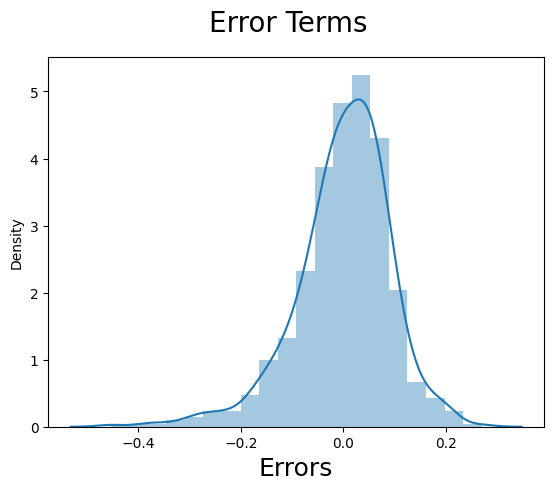

In [ ]:
y_train_pred = lr3.predict(X_train_lr3)
res = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

#Insights From the above histogram,

we could see that the Residuals are normally distributed.

### MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr3)

In [ ]:
num_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
data_new_test[num_vars] = scaler.transform(data_new_test[num_vars])

In [ ]:
data_new_test.head()

,cnt,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
256,0.547975,0,1,0.765327,0.733078,0.716795,0.298736,0,0,1,...,0,0,0,0,0,1,0,1,0,0
254,0.539692,0,1,0.729210,0.699932,0.711747,0.137137,0,0,1,...,0,0,0,1,0,0,0,1,0,0
249,0.227105,0,1,0.672912,0.622452,0.943016,0.153852,0,0,1,...,0,0,0,0,0,1,0,0,0,1
508,0.776346,0,1,0.742483,0.706048,0.736933,0.310273,0,1,0,...,0,0,0,0,0,1,0,1,0,0
109,0.451220,0,1,0.667720,0.649433,0.631534,0.452579,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
y_test = data_new_test.pop('cnt')
X_test = data_new_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 256 to 18
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       146 non-null    int64  
 1   workingday    146 non-null    int64  
 2   temp          146 non-null    float64
 3   atemp         146 non-null    float64
 4   hum           146 non-null    float64
 5   windspeed     146 non-null    float64
 6   season_1      146 non-null    int64  
 7   season_2      146 non-null    int64  
 8   season_3      146 non-null    int64  
 9   season_4      146 non-null    int64  
 10  yr_0          146 non-null    int64  
 11  yr_1          146 non-null    int64  
 12  mnth_1        146 non-null    int64  
 13  mnth_2        146 non-null    int64  
 14  mnth_3        146 non-null    int64  
 15  mnth_4        146 non-null    int64  
 16  mnth_5        146 non-null    int64  
 17  mnth_6        146 non-null    int64  
 18  mnth_7        146 non-null    int6

In [ ]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lr3 = sm.add_constant(X_test)
X_test_lr3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 256 to 18
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         146 non-null    float64
 1   temp          146 non-null    float64
 2   hum           146 non-null    float64
 3   windspeed     146 non-null    float64
 4   season_4      146 non-null    int64  
 5   yr_0          146 non-null    int64  
 6   yr_1          146 non-null    int64  
 7   mnth_1        146 non-null    int64  
 8   mnth_2        146 non-null    int64  
 9   mnth_5        146 non-null    int64  
 10  mnth_7        146 non-null    int64  
 11  mnth_9        146 non-null    int64  
 12  mnth_11       146 non-null    int64  
 13  mnth_12       146 non-null    int64  
 14  weekday_1     146 non-null    int64  
 15  weekday_2     146 non-null    int64  
 16  weathersit_1  146 non-null    int64  
 17  weathersit_2  146 non-null    int64  
 18  weathersit_3  146 non-null    int6

In [ ]:
# Making predictions using the final model (lr3)

y_pred = lr3.predict(X_test_lr3)
print(y_pred)

256    0.600249
254    0.614068
249    0.307558
508    0.783871
109    0.473476
         ...   
210    0.568425
342    0.357670
125    0.461621
663    0.742926
18     0.116379
Length: 146, dtype: float64


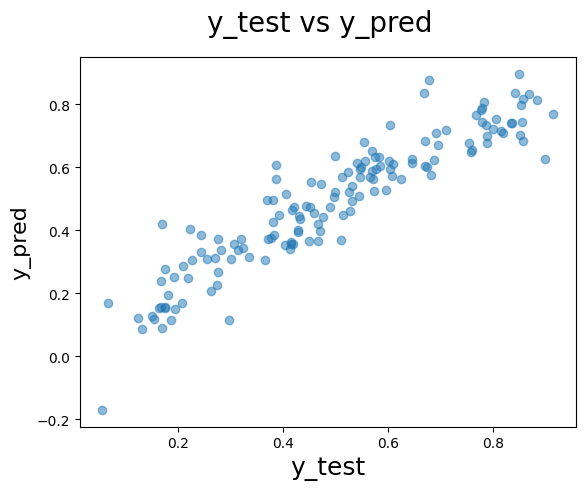

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8571122716585999

In [ ]:
X_test.shape

(146, 18)

In [ ]:
# n is number of rows in X

n = X_test.shape[0]
r2 = 0.8571122716585999

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8368604676417086

Train R^2 :0.827

Train Adjusted R^2 :0.822

Test R^2 :0.857

Test Adjusted R^2 :0.836

This is a really good model that can very well explain the X independent variables.


As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.4620' indicated that a unit increase in temp variable increases the bike hire numbers by 0.4620 units.

Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.0669’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.0669 units.

Year (yr1) - A coefficient value of ‘0.2213’ indicated that a unit increase in yr1 variable increases the bike hire numbers by 0.2213 units.

So, it's suggested to consider these variables utmost importance while planning, to achive maximum booking


Magnitude: The absolute value of the coefficient indicates the strength of the relationship between the predictor and the target. Larger absolute values generally mean a stronger influence.

Sign: The sign of the coefficient (positive or negative) indicates the direction of the relationship. A positive coefficient means an increase in the predictor leads to an increase in the target, and a negative coefficient means the opposite.


